In [1]:
import tensorflow as tf # Librería para AI hecha por Google
import numpy as np # Para trabajar con arreglos numéricos

In [2]:
# Creamos un array con 7 entradas de datos para nuestra neurona de tipo float
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
# Creamos otro array con 7 resultados para que aprenda nuestra neurona
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [3]:
# Creo una capa Densa que contiene una sola neurona

# las capas densas son las que tienen conexiones desde
# cada neurona hacía todas las neuronas de la siguiente capa

# Keras permite hacer nuestras redes neuronales de manera simple
# units -> neurona de salida
# input_shape -> neurona de entrada
capa = tf.keras.layers.Dense(units=1, input_shape=[1])

# Creamos nuestro modelo de keras para mandarle la capa y trabajar con ella
# El modelo secuencial es un modelo para trabajar con datos sencillos
# Existen modelos más avanzados (investigar*)
modelo = tf.keras.Sequential([capa])

# Creamos otro modelo con más capas y más neuronas
# Digamos que agregamos dos capas intermedias con tres neuronas c/u
# Hay una neurona de entrada y una de salida
# oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
# oculta2 = tf.keras.layers.Dense(units=3)
# salida = tf.keras.layers.Dense(units=1)
# modelo = tf.keras.Sequential([oculta1, oculta2, salida])


In [4]:
# Preparamos el modelo para ser compilado, le decimos como queremos que procese
# el aprendizaje automático (cálculos matemáticos)
modelo.compile(
    # Adam permite a la red cómo ajustar los pesos y sesgos de manera eficiente
    # para que aprenda y no desaprenda, es decir, que vaya mejorando.
    # Le indicamos un valor numérico que es la tasa de aprendizaje
    # ese número le dice que tanto ajustar los pesos y sesgos, si ponemos un número
    # muy pequeño los irá ajustando muy lento y si ponemos un número muy grande
    # quiza se pasará del número espera y no podrá hacer cambios suficientemente 
    # finos para llegar a la mejor opción.
    optimizer=tf.keras.optimizers.Adam(0.1),
    # Para la función de pérdida usaremos mean_squared_error, esta función considera que 
    # una poca cantidad de errores grandes es peor que una gran cantidad de errores pequeños
    loss='mean_squared_error'
)

In [5]:
# Procedemos a entrenarlo
print('Comenzando entrenamiento...')
# usamos la función fit, le indicamos los datos de entrada y resultados esperados
# y además le decimos cuántas vueltas quiere que lo intente (epochs=num_vueltas). 
# le ponemos verbose=False para evitar que imprima mucho mugrero xD
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print('¡Modelo Entrenado!')



Comenzando entrenamiento...
¡Modelo Entrenado!


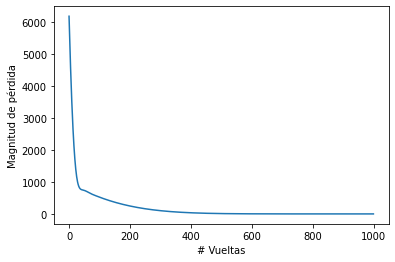

In [6]:
# Listo el modelo ya está entrendado y listo para hacer predicciones, pero 
# antes de hacer predicciones, veamos el resultado de la función de perdida.
# Esta función nos dice qué tan mal están los resultados de la red en cada
# vuelta que dio.
import matplotlib.pyplot as plt
plt.xlabel('# Vueltas')
plt.ylabel('Magnitud de pérdida')
plt.plot(historial.history['loss'])

In [7]:
# Ahora sí, hagamos una predicción
print('Hagamos una predicción...')
resutlado = modelo.predict([100.0])
print('El resultado es: '+str(resutlado)+ " Fahrenheit")


Hagamos una predicción...
El resultado es: [[211.74135]] Fahrenheit


In [8]:
# Revisemos la estructura interna de la red neuronal, para ver qué datos se asignaron
# después del entrenamiento a la conexión y al sesgo.
print('Variables internas del modelo')
print(capa.get_weights())

Variables internas del modelo
[array([[1.7983336]], dtype=float32), array([31.90799], dtype=float32)]


In [9]:
# =========== Análisis matemático ============
# Peso = 1.79
# Sesgo = 31.93

# Fórmula que dedujo la red neuronal:
# 100 * (1.79) = 179.8 + (31.9) = 211.74

# Fórmula que se utiliza en la vida real:
# F = C * 1.8 + 32

# Función Lineal:
# y = mx + b
# Que coincidencia!!

# Capas intermedias con sus pesos y sesgos
# print(oculta1.get_weights())
# print(oculta2.get_weights())
# print(salida.get_weights())
# No tiene caso intentar comprender esos números, son los que utilizó la red neuronal al azar.